In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [6]:
df = pd.read_csv('./../../data/processed/CN_ID_4_YM.csv')

In [3]:
df['date'] = pd.DatetimeIndex(pd.to_datetime(12*(df.YEAR - 1997) + df.MONTH, unit='M', origin=pd.Timestamp('1996-12-15'))).round('D')


AttributeError: 'DataFrame' object has no attribute 'MONTH'

In [4]:
i = 0
cuadro = df.loc[df.IMPORT == i].set_index(['CN ID 4', 'date'])[['VART']].unstack()['VART']


KeyError: 'date'

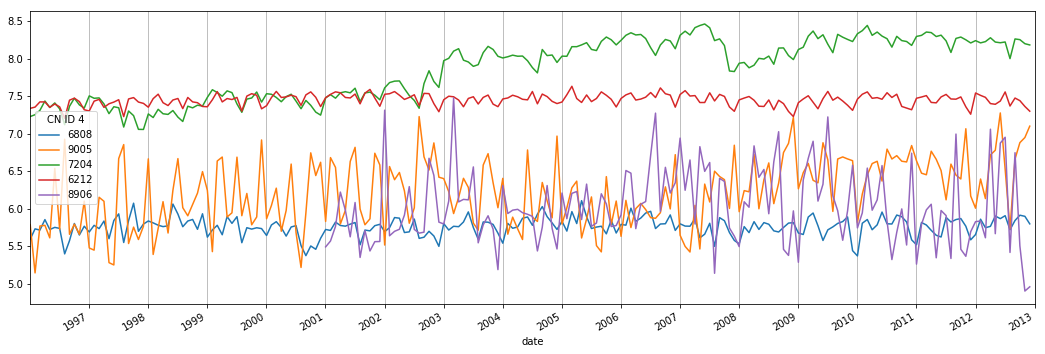

In [51]:
fig, ax = plt.subplots(1, figsize = (18, 6))
np.log10(cuadro).sample(5).T.plot(ax = ax)
ax.xaxis.set_ticks(pd.date_range('1997', '2014', freq='Y'))
ax.xaxis.grid()
plt.show()

# There are often cases of jumps from a year to the next. So it is advisable to subtract year mean, instead of rolling mean.

### Demeaning. Linearly

In [23]:
# year_means = cuadro.stack()#.T.groupby(pd.TimeGrouper(level = 0, freq = 'Y')).mean().T
cuadro_dem = cuadro.fillna(0).T.groupby(pd.Grouper(level = 'date', freq = 'Y')).apply(lambda x: x - np.mean(x)).T
cuadro_dem

date,1997-01-01 00:00:00,1997-01-31 00:00:00,1997-03-02 00:00:00,1997-04-02 00:00:00,1997-05-02 00:00:00,1997-06-02 00:00:00,1997-07-02 00:00:00,1997-08-02 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,...,2013-03-02 00:00:00,2013-04-02 00:00:00,2013-05-02 00:00:00,2013-06-02 00:00:00,2013-07-02 00:00:00,2013-08-01 00:00:00,2013-09-01 00:00:00,2013-10-01 00:00:00,2013-11-01 00:00:00,2013-12-01 00:00:00
CN ID 4,,,,,,,,,,,,,,,,,,,,,
101,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.231671e+06,-1.362455e+07,-5.944247e+06,-8.486168e+06,-2.235775e+06,1.434710e+07,2.901630e+06,7.377740e+06,8.369216e+06,1.507041e+07
102,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-2.212719e+06,-3.470441e+06,-2.394758e+07,-2.509423e+07,-2.184887e+07,-1.659299e+07,3.051704e+07,4.197173e+07,1.767599e+07,1.012334e+07
103,-3.970838e+05,-1.063501e+06,-7.008083e+04,4.008462e+05,-2.751338e+05,-1.226407e+06,-1.346495e+06,-7.426448e+05,3.001992e+05,2.493580e+06,...,2.080601e+06,1.670104e+06,-1.314483e+05,-6.767373e+05,-2.178566e+06,-1.513390e+06,-7.745703e+05,1.282460e+06,-8.946033e+05,-1.077785e+06
104,-3.287171e+05,1.148113e+06,3.445332e+06,-8.326351e+05,-3.424574e+06,-4.596119e+06,-4.173957e+06,-3.685813e+06,-3.966676e+06,-1.731116e+06,...,7.556476e+05,-1.956687e+06,-3.135547e+06,-2.200106e+06,-3.857118e+06,-3.785038e+06,-3.567527e+06,-3.703268e+06,-1.511736e+06,2.216212e+07
105,-8.710046e+05,-4.335006e+05,-1.329986e+05,1.307914e+05,-6.931236e+05,2.498913e+06,1.417557e+06,-6.066876e+05,3.187924e+05,-3.299456e+05,...,-1.485203e+06,3.763043e+06,6.300837e+05,1.154742e+06,-5.653073e+05,1.356067e+05,1.053402e+06,2.613333e+06,-2.708986e+06,-4.838115e+06
106,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-9.066648e+05,9.513052e+05,1.477970e+06,1.934459e+06,-4.711282e+04,-5.841818e+03,-8.966682e+04,8.784432e+05,-1.029240e+06,-1.686446e+06
201,3.081522e+05,-9.516478e+06,-6.511739e+06,-1.832006e+06,-1.389625e+06,-2.380050e+06,2.387367e+06,-1.251204e+06,3.792865e+06,1.163484e+07,...,1.580744e+06,-3.697567e+06,5.775583e+06,-5.992356e+06,-9.712411e+05,-4.981951e+05,-2.116313e+06,6.595345e+06,-5.218943e+06,4.872025e+06
202,-7.256649e+06,-7.713415e+06,4.131424e+06,3.436200e+06,3.839813e+06,1.367592e+06,-5.899248e+05,-6.292238e+05,3.713842e+06,3.755751e+06,...,-6.579327e+04,-7.730927e+04,8.215237e+05,5.569147e+05,1.166725e+06,-1.492903e+05,-8.213953e+05,8.956667e+05,-6.087623e+05,-6.595513e+05
203,-1.409413e+07,-1.683620e+07,-1.548321e+07,1.178182e+07,4.685671e+06,3.498757e+05,-5.234775e+06,-3.824274e+06,9.625897e+06,2.646082e+07,...,-8.903838e+06,-6.509323e+06,-1.128486e+07,-1.750085e+07,-7.674735e+05,-3.489215e+06,1.851695e+07,2.620105e+07,4.105133e+06,5.386152e+06


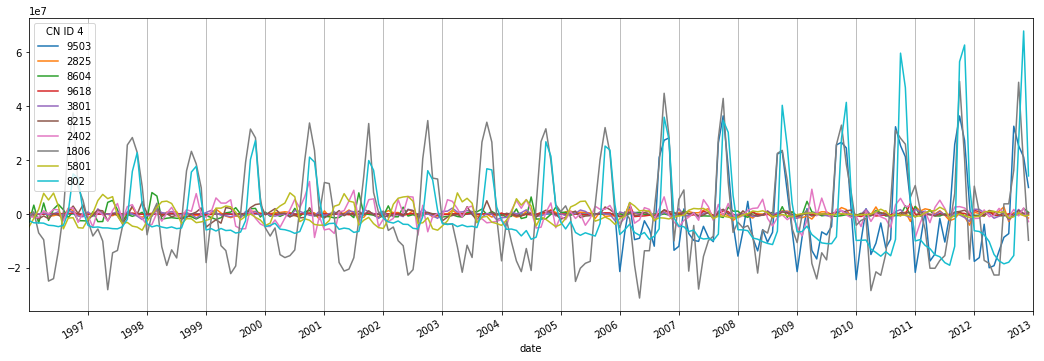

In [32]:
x = cuadro_dem

fig, ax = plt.subplots(1, figsize = (18, 6))
x.sample(10).T.plot(ax = ax)
ax.xaxis.set_ticks(pd.date_range('1997', '2014', freq='Y'))
ax.xaxis.grid()
plt.show()


### Try to fit seasonality

In [150]:
season_df = cuadro_dem.T.groupby(cuadro_dem.columns.month).mean().T

### Fourier

In [144]:
from scipy import fftpack

vec = np.sin(2 * np.pi * np.arange(12) / 12)
X = fftpack.fft(vec)

freqs = fftpack.fftfreq(len(vec)) * 12
freqs

X.round(3)

array([ 0.+0.j, -0.-6.j, -0.-0.j,  0.-0.j, -0.-0.j,  0.+0.j,  0.+0.j,
        0.-0.j, -0.+0.j,  0.+0.j, -0.+0.j, -0.+6.j])

In [145]:
freqs

array([ 0.,  1.,  2.,  3.,  4.,  5., -6., -5., -4., -3., -2., -1.])

[ 0.+0.j -0.-6.j -0.-0.j  0.-0.j -0.-0.j  0.-0.j  0.+0.j  0.+0.j -0.+0.j
  0.+0.j -0.+0.j -0.+6.j]
[-0.+0.j  6.-0.j -0.+0.j -0.-0.j  0.-0.j  0.+0.j  0.+0.j  0.-0.j  0.+0.j
 -0.+0.j -0.-0.j  6.+0.j]


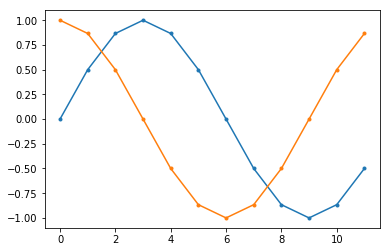

[ 0.  1.  2.  3.  4.  5. -6. -5. -4. -3. -2. -1.]
[0.+0.j 0.+0.j 0.-6.j 0.+0.j 0.+0.j 0.-0.j 0.+0.j 0.+0.j 0.-0.j 0.-0.j
 0.+6.j 0.-0.j]
[0.+0.j 0.+0.j 6.+0.j 0.+0.j 0.-0.j 0.-0.j 0.+0.j 0.+0.j 0.+0.j 0.-0.j
 6.-0.j 0.-0.j]


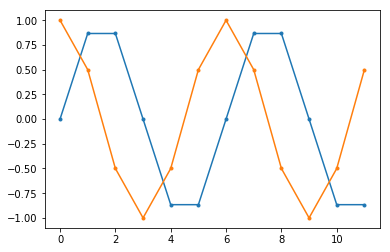

[ 0.  1.  2.  3.  4.  5. -6. -5. -4. -3. -2. -1.]
[ 0.   +0.j     0.   +0.j     0.   +0.j    -4.242-4.242j  0.   -0.j
  0.   -0.j     0.   +0.j     0.   +0.j     0.   +0.j    -4.242+4.242j
  0.   -0.j     0.   -0.j   ]
[0.+0.j 0.+0.j 0.+0.j 0.-6.j 0.-0.j 0.-0.j 0.+0.j 0.+0.j 0.+0.j 0.+6.j
 0.-0.j 0.-0.j]
[0.+0.j 0.+0.j 0.+0.j 6.+0.j 0.+0.j 0.-0.j 0.+0.j 0.+0.j 0.-0.j 6.-0.j
 0.-0.j 0.-0.j]


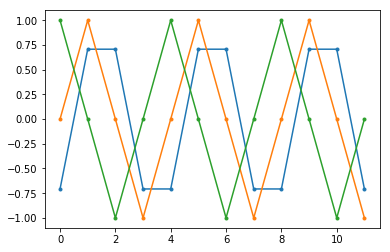

[ 0.  1.  2.  3.  4.  5. -6. -5. -4. -3. -2. -1.]
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-0.j 0.-0.j 0.+0.j 0.+0.j 0.+0.j 0.-0.j
 0.-0.j 0.-0.j]
[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.-0.j  0.-0.j 12.+0.j  0.+0.j  0.+0.j
  0.-0.j  0.-0.j  0.-0.j]


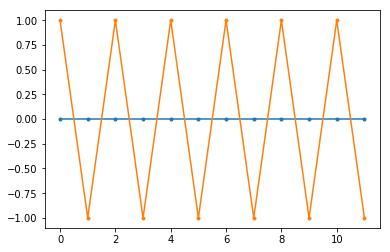

In [148]:

vec = np.sin(2 * np.pi * np.arange(12) / 12)
print(np.fft.fft(vec).round(3))
plt.plot(range(12), vec, marker = '.')
vec = np.cos(2 * np.pi * np.arange(12) / 12)
print(np.fft.fft(vec).round(3))
plt.plot(range(12), vec, marker = '.')
plt.show()

print(freqs)

vec = np.sin(4 * np.pi * np.arange(12) / 12).round(3)
print(np.fft.fft(vec).round(3))
plt.plot(range(12), vec, marker = '.')
vec = np.cos(4 * np.pi * np.arange(12) / 12).round(3)
print(np.fft.fft(vec).round(3))
plt.plot(range(12), vec, marker = '.')
plt.show()

print(freqs)

vec = np.sin(6 * np.pi * np.arange(12) / 12 -.25 *np.pi).round(3)
print(np.fft.fft(vec).round(3))
plt.plot(range(12), vec, marker = '.')
vec = np.sin(6 * np.pi * np.arange(12) / 12).round(3)
print(np.fft.fft(vec).round(3))
plt.plot(range(12), vec, marker = '.')
vec = np.cos(6 * np.pi * np.arange(12) / 12).round(3)
print(np.fft.fft(vec).round(3))
plt.plot(range(12), vec, marker = '.')
plt.show()

print(freqs)

vec = np.sin(12 * np.pi * np.arange(12) / 12).round(3)
print(np.fft.fft(vec).round(3))
plt.plot(range(12), vec, marker = '.')
vec = np.cos(12 * np.pi * np.arange(12) / 12).round(3)
print(np.fft.fft(vec).round(3))
plt.plot(range(12), vec, marker = '.')
plt.show()

[-0.539+0.j    -0.232+1.768j  0.036+0.645j -0.174+1.075j -0.082+0.191j
  0.509+0.872j -0.135+0.j     0.509-0.872j -0.082-0.191j -0.174-1.075j
  0.036-0.645j -0.232-1.768j]


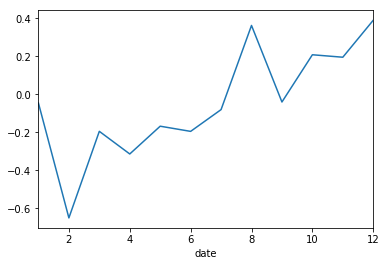

In [167]:
vec = season_df.loc[101]/np.sqrt((season_df.loc[101]**2).sum())

vec.plot()
# vec = np.cos(6 * np.pi * np.arange(12) / 12).round(3)
print(np.fft.fft(vec).round(3))


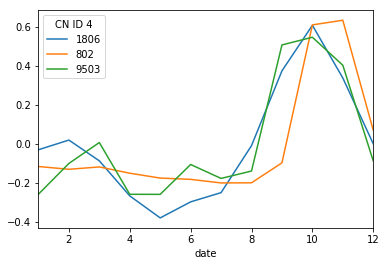

In [225]:
season_df_norm.loc[[1806, 802, 9503]].T.plot()

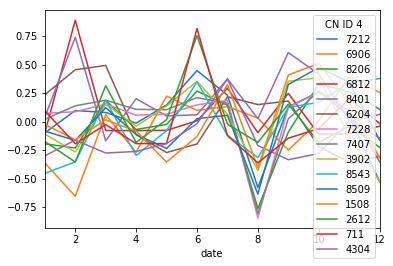

In [219]:
season_df_norm.sample(15).T.plot()

In [171]:
season_df_norm = season_df.apply(lambda x: x/np.sqrt((x**2).sum()), axis = 1)

In [187]:
values = np.array([v for v in season_df_norm.apply(lambda x: np.fft.fft(x).round(3) , axis = 1).values])

In [194]:
coeffs = pd.DataFrame(values, index = season_df.index, columns=freqs).T.sort_index().T.iloc[:, :7]

In [226]:
coeffs.loc[[1806, 802, 9503]]

,-6.0,-5.0,-4.0,-3.0,-2.0,-1.0,0.0
CN ID 4,,,,,,,
1806,(-0.089+0j),(0.066+0.011j),(0.082-0.019j),(-0.036+0.606j),(-0.888+0.551j),(0.631-2.031j),(0.032+0j)
802,(-0.091+0j),(0.2-0.133j),(0.243+0.395j),(-0.704+0.578j),(-1.119-0.773j),(0.757-1.571j),(-0.044+0j)
9503,(0.368+0j),(-0.049+0.212j),(-0.259-0.36j),(-0.242+0.827j),(-1.269+0.28j),(0.049-1.802j),(0.09+0j)


In [227]:
abs_ = pd.DataFrame(np.abs(coeffs), index = coeffs.index, columns = coeffs.columns)
s = abs_.loc[[1806, 802, 9503]].style.background_gradient(cmap='viridis')
s

,-6.0,-5.0,-4.0,-3.0,-2.0,-1.0,0.0
CN ID 4,,,,,,,
1806,0.089,0.0669104,0.0841724,0.607068,1.04506,2.12676,0.032
802,0.091,0.240185,0.463761,0.910879,1.36003,1.74387,0.044
9503,0.368,0.217589,0.443487,0.86168,1.29952,1.80267,0.09


In [230]:
s = abs_.sample(10).style.background_gradient(cmap='viridis')
s

,-6.0,-5.0,-4.0,-3.0,-2.0,-1.0,0.0
CN ID 4,,,,,,,
8108,0.397,0.521476,1.03717,1.81772,1.08342,0.283544,0.166
3602,0.637,1.34953,0.592224,1.54663,0.765773,0.743454,0.435
7112,0.069,1.31669,0.851608,0.80511,1.2567,1.13767,0.191
1505,1.647,0.400824,1.38769,0.33267,1.24029,0.911035,0.396
7308,0.126,0.802477,1.21381,1.06889,1.56259,0.533184,0.106
8215,0.434,0.554886,0.993336,1.0775,1.5296,1.05227,0.088
8440,0.824,1.02114,0.737916,0.917039,1.21374,1.30367,0.346
2919,0.743,0.307327,1.63271,0.658502,1.06843,1.12508,0.492
2932,0.35,0.337378,1.90641,1.32732,0.23689,0.608616,0.008


In [228]:
angle = pd.DataFrame(np.angle(coeffs)/np.pi, index = coeffs.index, columns = coeffs.columns)
s = angle.loc[[1806, 802, 9503]].style.background_gradient(cmap='viridis')
s

,-6.0,-5.0,-4.0,-3.0,-2.0,-1.0,0.0
CN ID 4,,,,,,,
1806,1,0.0525685,-0.0724758,0.518887,0.823225,-0.404116,0
802,1,-0.186799,0.324448,0.781185,-0.807575,-0.357069,1
9503,0,0.572302,-0.698516,0.590615,0.930874,-0.491347,0


In [229]:
s = angle.sample(10).style.background_gradient(cmap='viridis')
s

,-6.0,-5.0,-4.0,-3.0,-2.0,-1.0,0.0
CN ID 4,,,,,,,
502,0,0.777038,-0.176508,0.581845,-0.818122,0.062833,1
1905,1,-0.774641,-0.581741,0.793164,-0.936358,-0.626909,0
6505,1,0.809343,-0.650426,0.555529,0.431728,-0.378193,0
5201,0,0.65051,-0.304887,0.512149,-0.947718,-0.816087,0
3805,1,0.281132,-0.132699,0.625964,-0.392874,0.280129,0
8505,0,0.803215,-0.227103,0.609142,-0.936573,0.308256,0
2504,0,0.940504,-0.0882714,0.739028,0.643124,0.208917,0
6107,0,-0.848857,0.364858,0.669714,0.321916,-0.596778,0
3803,0,-0.833279,-0.347297,-0.786773,-0.403652,0.333676,1


## Fitting wave components

In [361]:
from scipy.optimize import curve_fit

def wave_fun(x, A1, A2, A3, A6, f1, f2, f3, f6):
    y = A1*np.sin(2* np.pi * np.array(x) / 12 -f1 *np.pi) + \
         A2*np.sin(4 * np.pi * np.array(x) / 12 -f2 *np.pi)+ \
          A3*np.sin(6 * np.pi * np.array(x) / 12 -f3 *np.pi)+ \
           A6*np.sin(12 * np.pi * np.array(x) / 12 -f6 *np.pi)
    return y

def wave_fun2(x, A1, A2, f1, f2):
    y = A1*np.sin(2* np.pi * np.array(x) / 12 -f1 *np.pi) + \
         A2*np.sin(4 * np.pi * np.array(x) / 12 -f2 *np.pi)
    return y

def wave_fun1(x, A1, f1):
    y = A1*np.sin(2*np.pi * np.array(x) / 12 -f1 *np.pi)
    return y

season_df_norm = season_df.apply(lambda x: x/np.sqrt((x**2).sum()), axis = 1)


In [362]:
def fit_wave(x):
    popt, pcov = curve_fit(wave_fun, range(1, 13), x,
                          bounds = [[0, 0, 0, 0, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, 2, 2, 2, 2]])
    return popt

def fit_wave2(x):
    popt, pcov = curve_fit(wave_fun2, range(1, 13), x,
                          bounds = [[0, 0, 0, 0], [np.inf, np.inf, 2, 2]])
    return popt

def fit_wave1(x):
    popt, pcov = curve_fit(wave_fun1, range(1, 13), x, bounds = [[0, 0], [np.inf, 2]])
    return popt

fit_results = season_df_norm.head(20).apply(lambda x: fit_wave2(x), axis = 1)
fit_results = np.array([r for r in fit_results.values])


In [363]:
results = pd.DataFrame(fit_results, columns = ['A1', 'A2', 'f1', 'f2'], index = season_df_norm.head(20).index)
# results = pd.DataFrame(fit_results, columns = ['A1', 'f1'], index = season_df_norm.head(20).index)

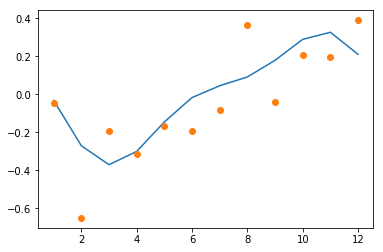

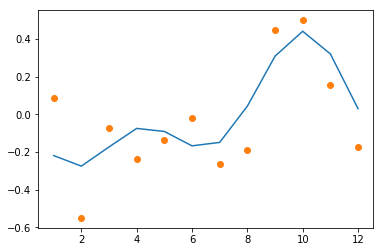

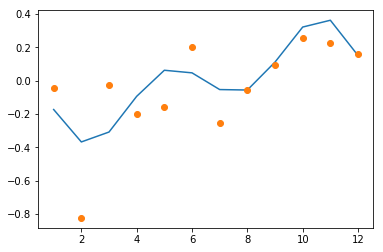

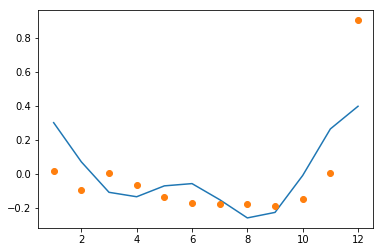

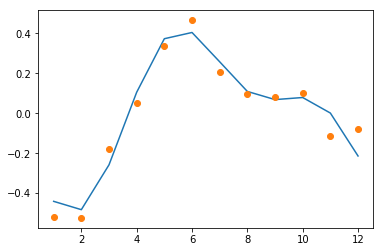

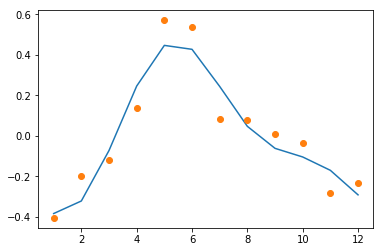

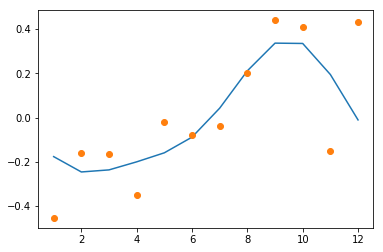

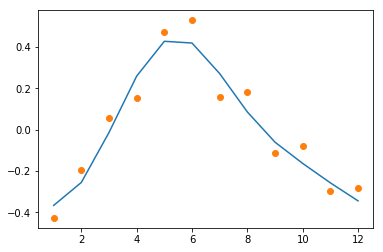

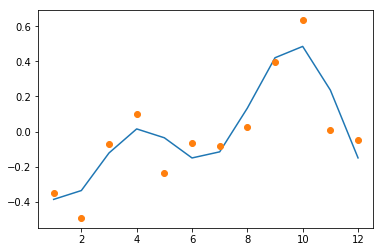

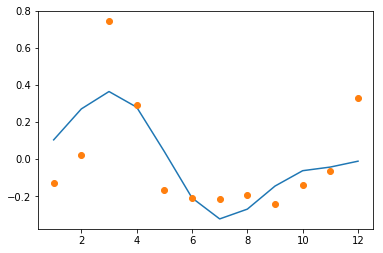

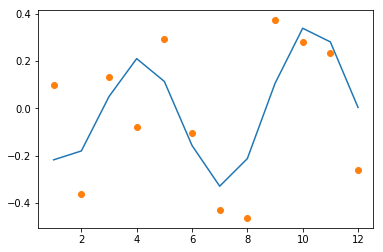

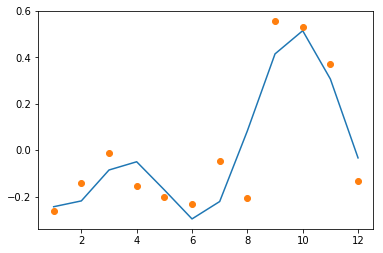

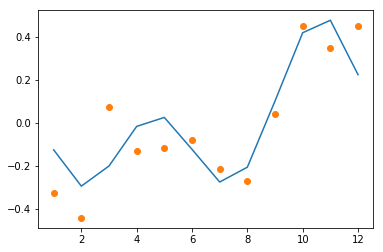

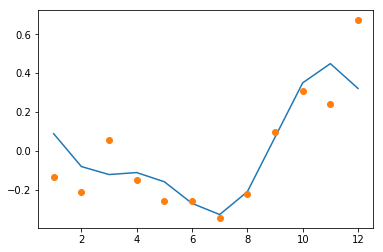

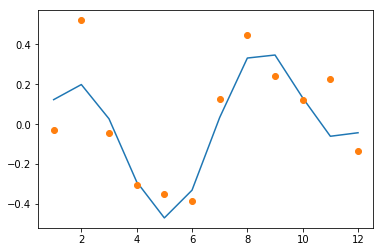

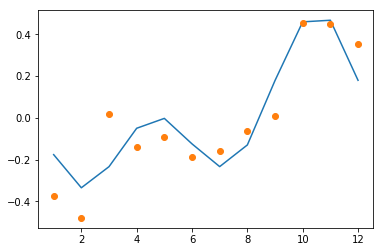

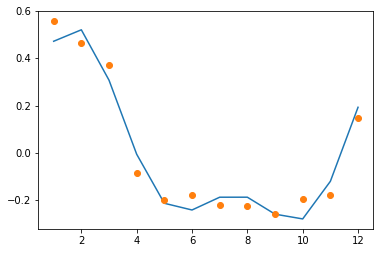

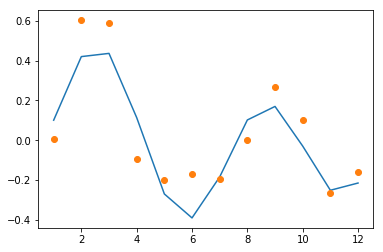

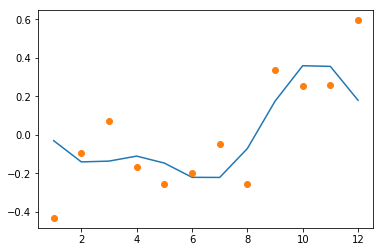

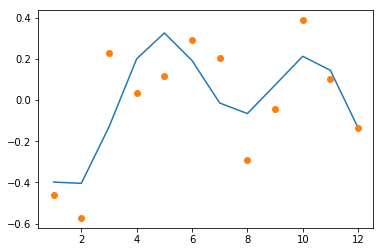

In [365]:
x = range(1, 13)
for i, row in results.iterrows():
    plt.plot(x, wave_fun2(x, *results.loc[i].values))
    plt.plot(season_df_norm.loc[i], marker = 'o', lw = 0)
    plt.show()

In [368]:
results.style.background_gradient(cmap='viridis')

,A1,A2,f1,f2
CN ID 4,,,,
101,0.297181,0.107693,1.12513,1.35123
102,0.26031,0.185586,1.12378,0.880242
103,0.216014,0.212142,1.07738,1.15374
104,0.235313,0.16956,1.58088,1.47589
105,0.349545,0.186877,0.654672,1.16985
106,0.359477,0.137825,0.504737,1.16296
201,0.289252,0.0697862,1.043,0.747224
202,0.383162,0.0853386,0.480419,1.14387
203,0.270844,0.251746,1.00021,0.797581


### PCA

In [104]:
# PCA doesn't seem to work

# from sklearn.preprocessing import StandardScaler

# # Standardizing the features
# PCA_m = StandardScaler().fit_transform(season_df)
# # pd.DataFrame(PCA_m).sample(10).T.plot()

# from sklearn.decomposition import PCA

# p = 3
# pca = PCA(n_components=p)

# principalComponents = pca.fit_transform(PCA_m)

# principalDf = pd.DataFrame(data = principalComponents, columns = range(p))

# filtered = pca.inverse_transform(principalComponents)
# components = pd.DataFrame(pca.components_)

# components.T.plot()
# pd.DataFrame(data = filtered, columns = PCA_m_df.columns, index = PCA_m_df.index).head(10).T.plot()

### Demeaning. Log

In [5]:
# year_means = cuadro.stack()#.T.groupby(pd.TimeGrouper(level = 0, freq = 'Y')).mean().T
cuadro_dem = np.log10(cuadro).T.groupby(pd.Grouper(level = 'date', freq = 'Y')).apply(lambda x: x - np.mean(x)).T
cuadro_dem

date,1997-01-01 00:00:00,1997-01-31 00:00:00,1997-03-02 00:00:00,1997-04-02 00:00:00,1997-05-02 00:00:00,1997-06-02 00:00:00,1997-07-02 00:00:00,1997-08-02 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,...,2013-03-02 00:00:00,2013-04-02 00:00:00,2013-05-02 00:00:00,2013-06-02 00:00:00,2013-07-02 00:00:00,2013-08-01 00:00:00,2013-09-01 00:00:00,2013-10-01 00:00:00,2013-11-01 00:00:00,2013-12-01 00:00:00
CN ID 4,,,,,,,,,,,,,,,,,,,,,
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.033324,-0.498261,-0.088754,-0.186783,0.023446,0.328382,0.142504,0.224898,0.241211,0.337835
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.001255,-0.005978,-0.091101,-0.096399,-0.081568,-0.058575,0.106435,0.138594,0.067304,0.042526
103,-0.026494,-0.094333,0.003280,0.042862,-0.015150,-0.112663,-0.126688,-0.060347,0.034700,0.184971,...,0.072628,0.059783,-0.001568,-0.021985,-0.083753,-0.055307,-0.025752,0.047294,-0.030419,-0.037639
104,0.080019,0.165323,0.271648,0.046603,-0.183561,-0.348438,-0.281593,-0.215284,-0.252191,-0.020214,...,0.267474,0.006485,-0.186026,-0.026874,-0.367421,-0.345493,-0.285331,-0.321888,0.061539,0.926916
105,-0.059009,-0.025998,-0.004696,0.013180,-0.045284,0.147360,0.091167,-0.038767,0.025485,-0.018539,...,-0.023276,0.059075,0.011814,0.020096,-0.007667,0.003861,0.018508,0.042323,-0.044952,-0.085452
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.071154,0.082315,0.117497,0.145844,0.006610,0.010016,0.003071,0.077215,-0.083472,-0.156227
201,0.004295,-0.068882,-0.045165,-0.010628,-0.007501,-0.014534,0.018319,-0.006527,0.027548,0.075726,...,0.009514,-0.020911,0.032260,-0.034834,-0.004930,-0.002216,-0.011571,0.036569,-0.030092,0.027460
202,-0.214155,-0.233440,0.104520,0.090512,0.098699,0.045942,-0.000913,-0.001907,0.096161,0.097007,...,-0.000780,-0.001903,0.078002,0.055966,0.105164,-0.008986,-0.081374,0.083981,-0.057142,-0.062808
203,-0.073626,-0.090558,-0.082121,0.060176,0.027389,0.006066,-0.023038,-0.015501,0.050474,0.121031,...,-0.034767,-0.024361,-0.045368,-0.074327,-0.000380,-0.011582,0.071662,0.097339,0.018982,0.023932


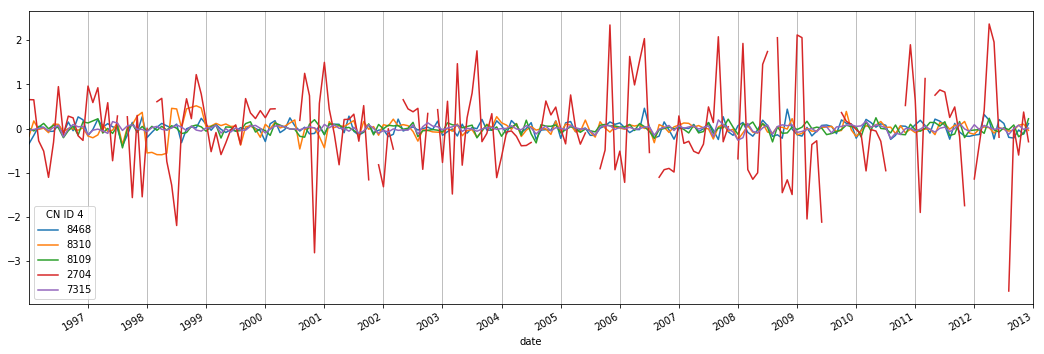

In [22]:
x = cuadro_dem

fig, ax = plt.subplots(1, figsize = (18, 6))
x.sample(5).T.plot(ax = ax)
ax.xaxis.set_ticks(pd.date_range('1997', '2014', freq='Y'))
ax.xaxis.grid()
plt.show()

In [ ]:
df.groupby(df['Departure_Date'].dt.month)